#### Nama = `Ahmad Hamdani`
#### Nim = `233307092`
#### Kelas = `4D`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/supervised_5_emails.csv')
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
df.isnull().sum()

text    0
spam    0
dtype: int64

1. Memisahkan Kolom Input dan Label

Pada langkah ini, kolom text yang berisi isi email dipisahkan sebagai fitur input (X), dan kolom spam yang berisi label (spam atau tidak) digunakan sebagai target (y).

In [5]:
X = df['text']
y = df['spam']


2. Mengubah Teks Menjadi Fitur Numerik

TfidfVectorizer digunakan untuk mengubah data teks menjadi representasi numerik menggunakan TF-IDF, yang mempertimbangkan pentingnya kata dalam setiap dokumen.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)


3. Memisahkan Data Menjadi Data Latih dan Uji
python
Salin
Edit


train_test_split digunakan untuk membagi dataset menjadi data latih (80%) dan data uji (20%). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji kinerjanya.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


4. Membuat Model Naive Bayes

Model Naive Bayes digunakan untuk klasifikasi teks, dan MultinomialNB dipilih karena cocok untuk data berbasis frekuensi kata seperti teks.

In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()


5. Melatih Model Naive Bayes

In [9]:
model.fit(X_train, y_train)


MultinomialNB()

Pada langkah ini, model dilatih menggunakan data latih (X_train dan y_train). Proses ini memungkinkan model untuk mempelajari pola yang ada dalam data.

6. Menguji Model pada Data Uji

In [10]:
accuracy = model.score(X_test, y_test)
print(f"Akurasi model: {accuracy}")


Akurasi model: 0.8979057591623036


Setelah model dilatih, kita mengujinya menggunakan data uji (X_test dan y_test) untuk menghitung akurasi dan mengukur kinerja model dalam mengklasifikasikan spam.



7. Memprediksi dengan Model
python
Salin
Edit


In [11]:
y_pred = model.predict(X_test)
print(y_pred)


[0 0 0 ... 1 0 0]


Di sini, kita menggunakan model untuk memprediksi label spam pada data uji, hasil prediksi disimpan dalam variabel y_pred.

8. Menghitung Precision, Recall, dan F1-Score

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       856
           1       1.00      0.60      0.75       290

    accuracy                           0.90      1146
   macro avg       0.94      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146



Fungsi classification_report memberikan metrik evaluasi penting seperti precision, recall, dan F1-score, yang memberi gambaran lebih lengkap tentang kinerja model.

9. Menampilkan Confusion Matrix
python
Salin
Edit


In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[856   0]
 [117 173]]


Confusion matrix menunjukkan jumlah prediksi yang benar dan salah untuk masing-masing kelas (spam dan bukan spam), memberikan gambaran yang lebih jelas mengenai kesalahan model.

10. Visualisasi Confusion Matrix

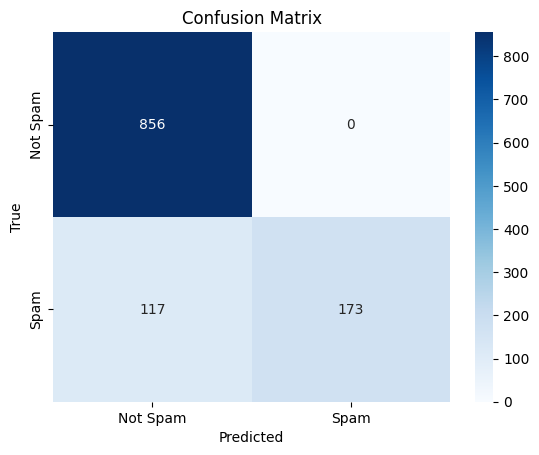

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Visualisasi confusion matrix menggunakan seaborn.heatmap membuatnya lebih mudah untuk memeriksa hasil klasifikasi model.

11. Menguji Fungsi Prediksi Spam

In [15]:
teks_baru = "Congratulations! You've won a free trip."
hasil_prediksi = model.predict(vectorizer.transform([teks_baru]))
print(f"Teks: {teks_baru}")
print(f"Hasil prediksi: {'Spam' if hasil_prediksi[0] == 1 else 'Not Spam'}")


Teks: Congratulations! You've won a free trip.
Hasil prediksi: Not Spam


Pada langkah ini, kita menguji model dengan memasukkan teks baru yang belum ada dalam data latih. Fungsi predict() digunakan untuk mendapatkan prediksi apakah teks tersebut spam atau tidak. Hasilnya diubah menjadi label 'Spam' atau 'Not Spam' berdasarkan nilai prediksi (1 untuk spam, 0 untuk tidak spam).

In [16]:
teks_list = ["Free money waiting for you", "Meeting at 3 PM tomorrow", "Congratulations! You've won a prize!"]
prediksi_list = model.predict(vectorizer.transform(teks_list))
for teks, prediksi in zip(teks_list, prediksi_list):
    print(f"Teks: {teks} -> {'Spam' if prediksi == 1 else 'Not Spam'}")


Teks: Free money waiting for you -> Not Spam
Teks: Meeting at 3 PM tomorrow -> Not Spam
Teks: Congratulations! You've won a prize! -> Not Spam


In [17]:
teks_list = ["naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio"]
prediksi_list = model.predict(vectorizer.transform(teks_list))
for teks, prediksi in zip(teks_list, prediksi_list):
    print(f"Teks: {teks} -> {'Spam' if prediksi == 1 else 'Not Spam'}")


Teks: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  market